In [73]:
import tensorflow as tf
import mlflow
import numpy as np
import matplotlib.pyplot as plt

In [74]:
import sys
sys.executable

'C:\\Python310\\python.exe'

In [75]:
!python --version

Python 3.10.5


In [76]:
print(tf.__version__)

2.12.0


In [77]:
print(mlflow.__version__)

2.10.0


In [78]:
def load_data():
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    return train_images, train_labels, test_images, test_labels, class_names

In [79]:
train_images, train_labels, test_images, test_labels, class_names= load_data()

In [80]:
print(train_images.shape)
#Each Label is between 0-9train_labels
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [81]:
def get_val_data(test_images, test_labels):
    test_images_sub_arr = np.array_split(test_images, 2)
    val_images = test_images_sub_arr[0]
    test_images = test_images_sub_arr[1]
    

    test_labels_sub_arr = np.array_split(test_labels, 2)
    val_labels = test_labels_sub_arr[0]
    test_labels = test_labels_sub_arr[1]
    
    return val_images, val_labels, test_images, test_labels

In [82]:
val_images, val_labels, test_images, test_labels = get_val_data(test_images, test_labels)

In [83]:
print(val_images.shape)
print(test_images.shape)

print(val_labels.shape)
print(test_labels.shape)

(5000, 28, 28)
(5000, 28, 28)
(5000,)
(5000,)


### Preprocess the data

The data must be preprocessed before training the network.

**If you inspect the images in the training set, you will see that the pixel values fall in the range of 0 to 255.**

In [84]:
def check_image_pixel_values(single_image):
    plt.figure()
    plt.imshow(single_image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

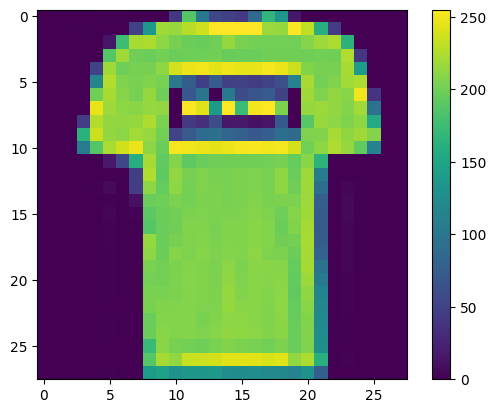

In [85]:
check_image_pixel_values(train_images[1])

### Image Scaling

Scale these values to a range of 0 to 1 before feeding them to the neural network model. 

To do so, divide the values by 255. It's important that the training set, validation set and testing set be preprocessed in the same way:

In [86]:
def image_scaling(img_arr):
    scaled_img = img_arr / 255.0
    return scaled_img

In [87]:
scaled_train_images = image_scaling(train_images)
scaled_val_images = image_scaling(val_images)
scaled_test_images = image_scaling(test_images)

In [88]:
def verify_data_format(img_arr, img_labels,class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img_arr[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[img_labels[i]])
    plt.show()

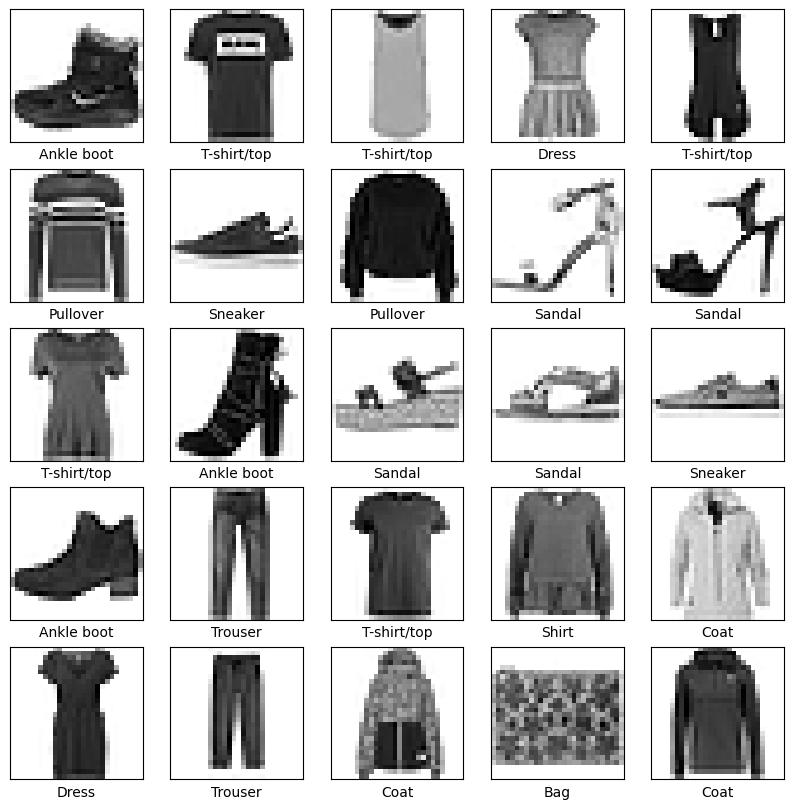

In [89]:
verify_data_format(scaled_train_images, train_labels,class_names)

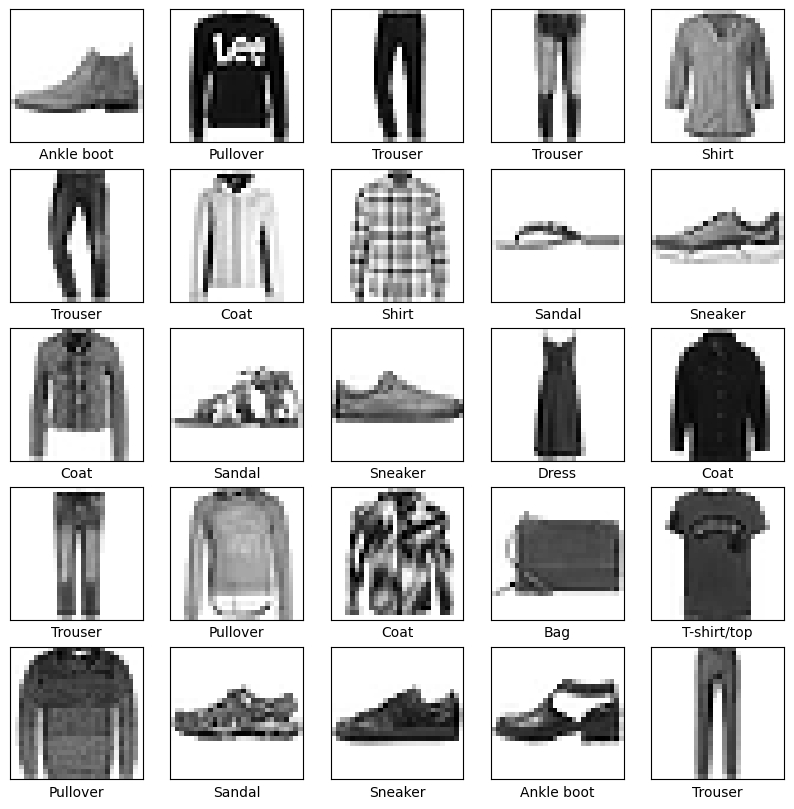

In [90]:
verify_data_format(scaled_val_images, val_labels,class_names)

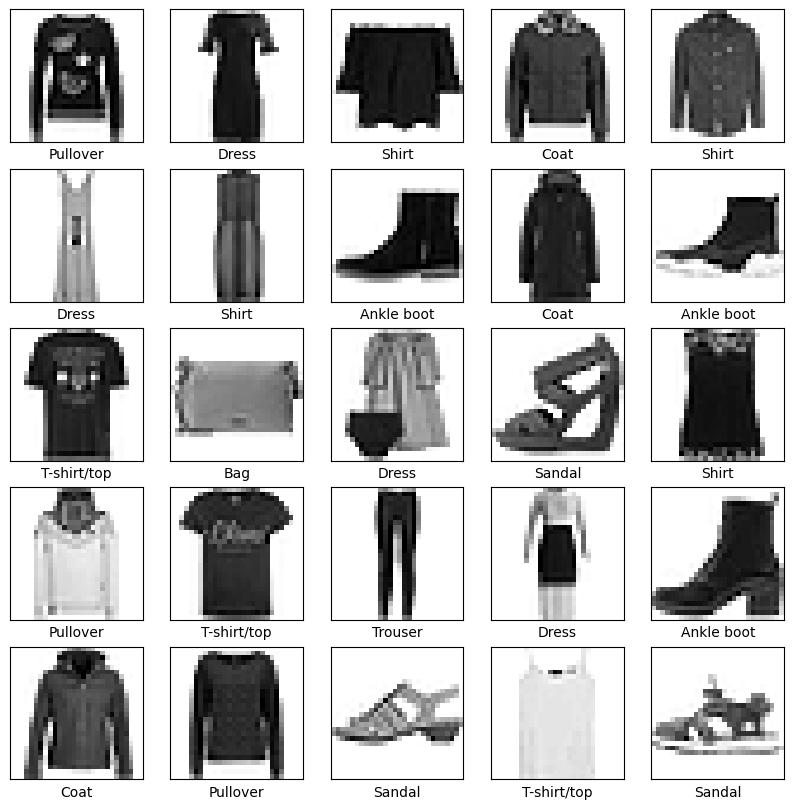

In [91]:
verify_data_format(scaled_test_images, test_labels,class_names)

### Build the model

In [92]:
def tf_model_build():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    return model

### Compile the model

In [93]:
def tf_compile_model(model):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

### Training the model

In [94]:
import mlflow
mlflow.tensorflow.autolog(every_n_iter=2)

Note:: Autologging is known to be compatible with the following package versions: ``2.3.0`` <= ``tensorflow`` <= ``2.12.0``. Autologging may not succeed when used with package versions outside of this range.

In [95]:
def tf_train_model(scaled_train_images, train_labels, epochs, batch_size, scaled_val_images, val_labels):
    model.fit(scaled_train_images, 
              train_labels, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_data=(scaled_val_images, val_labels)
             )
    return model

In [96]:
model = tf_model_build()
model = tf_compile_model(model)

epochs = 10
batch_size = 32
model = tf_train_model(scaled_train_images, train_labels, epochs, batch_size, scaled_val_images, val_labels)


2024/02/01 18:23:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2695efee68ad4365895e4b6106decc92', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4942 - accuracy: 0.8244 - val_loss: 0.4403 - val_accuracy: 0.8448
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8634 - val_loss: 0.3900 - val_accuracy: 0.8616
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.8775 - val_loss: 0.3683 - val_accuracy: 0.8680
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8861 - val_loss: 0.3689 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8908 - val_loss: 0.3630 - val_accuracy: 0.8670
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2779 - accuracy: 0.8974 - val_loss: 0.3622 - val_accuracy: 0.8716
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9008 - val_loss: 0.3450 - val_accuracy:

INFO:tensorflow:Assets written to: C:\Users\Thoma\AppData\Local\Temp\tmpx95cf35_\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Thoma\AppData\Local\Temp\tmpx95cf35_\model\data\model\assets


### Evaluate Model in test Images

In [97]:
train_loss, train_acc = model.evaluate(scaled_train_images,  train_labels, verbose=2)
print('\ntrain accuracy:', train_acc)  

1875/1875 - 2s - loss: 0.2286 - accuracy: 0.9150 - 2s/epoch - 1ms/step

train accuracy: 0.9150333404541016


In [98]:
val_loss, val_acc = model.evaluate(scaled_val_images,  val_labels, verbose=2)
print('\nval accuracy:', val_acc)  

157/157 - 0s - loss: 0.3549 - accuracy: 0.8772 - 177ms/epoch - 1ms/step

val accuracy: 0.8772000074386597


In [99]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)  

157/157 - 0s - loss: 47.7055 - accuracy: 0.8800 - 225ms/epoch - 1ms/step

Test accuracy: 0.8799999952316284


In [100]:
predictions = model.predict(test_images)
predictions[0]

157/157 [==============================] - 0s 1ms/step


array([ -230.64342, -1850.4902 ,  1404.6987 , -1058.4272 ,   603.9955 ,
       -3602.1362 ,   769.4805 , -1777.8618 , -1971.9973 , -1714.9155 ],
      dtype=float32)

In [101]:
import numpy as np
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

2

In [102]:
test_labels[0]

2

In [103]:
class_names[0]

'T-shirt/top'

## Experiment Tracking for Tensorflow based Models

In [104]:
def tf_experiment_tracking(exp_name, run_name, batch_size, epochs, train_loss, train_acc, 
                           val_loss, val_acc, test_loss, test_acc, model_signature):
    mlflow.set_experiment(exp_name)
    with mlflow.start_run(run_name=run_name):
        mlflow.log_param("batch_size", batch_size)
        #mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("epochs", epochs)
        mlflow.log_metric("train_loss", train_loss)
        mlflow.log_metric("train_accuracy", train_acc)
        mlflow.log_metric("val_loss", val_loss)
        mlflow.log_metric("val_accuracy", val_acc)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_acc)
        mlflow.tensorflow.log_model(model, "mnist", signature=model_signature)
    mlflow.end_run()

In [105]:
from mlflow.models.signature import infer_signature
model_signature = infer_signature(scaled_test_images, model.predict(scaled_test_images))

157/157 [==============================] - 0s 958us/step


In [106]:
from datetime import datetime
exp_timestamp = datetime.now().strftime("%Y%m%d")
exp_name = "live_mnist_exp_" + exp_timestamp
print(exp_name)

run_timestamp = datetime.now().strftime("%Y%m%d--%H%M%S")
run_name = "live_mnist_exp_run_"+ run_timestamp
print(run_name)

live_mnist_exp_20240201
live_mnist_exp_run_20240201--182428


In [107]:
tf_experiment_tracking(exp_name, run_name, batch_size, epochs, train_loss, train_acc, 
                           val_loss, val_acc, test_loss, test_acc, model_signature)

INFO:tensorflow:Assets written to: C:\Users\Thoma\AppData\Local\Temp\tmp0w2n9wx2\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\Thoma\AppData\Local\Temp\tmp0w2n9wx2\model\data\model\assets


## Load the model from mlflow run and do prediction

In [108]:
import mlflow
logged_model = 'runs:/1a7e36d694384790a9fab9dc2dee7c87/mnist'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
#test_images1 = scaled_test_images.astype('float64')
predictions = loaded_model.predict(scaled_test_images)
predictions[0]

MlflowException: Run '1a7e36d694384790a9fab9dc2dee7c87' not found

In [ ]:
predictions[4]

In [ ]:
np.argmax(predictions[5])

In [ ]:
test_labels[5]

In [ ]:
class_names[5]

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(scaled_test_images)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

https://www.tensorflow.org/tutorials/keras/classification

## Thank You